In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
%load_ext autoreload
%autoreload 2

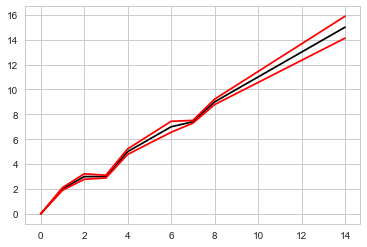

In [2]:
def kalman1d(n, z, sigma0=0.1, r=0.1):
    """
    :param n: Number of time moments
    :param z: measurements
    :param sigma0:
    :param r:
    :return: Corrected predicted values, Confidence interval values
    """
    xhatminus = np.zeros(n)  # Predictions / priors
    xhatminus[0] = 1
    xhat = np.zeros(n)  # updated estimates
    Pminus = np.zeros(n)  # Projected variance values
    sigmas = np.zeros(n)  # Variance of the estimate
    sigmas[0] = sigma0
    P = np.zeros(n)  # Updated error variance
    K = np.zeros(n)  # Kalman gain values
    R = r  # Mesuarement variance during the inspection
    Q = sigma0  # Process variance 
    P[0] = 1.0
    A = 1.0
    for k in range(1, n):
        xhatminus[k] = xhatminus[k-1] * A + 1
        if z[k] == -1:
            Pminus[k] = Pminus[k-1] + Q
            xhat[k] = xhatminus[k]
        else:
            Pminus[k] = P[k-1] + Q
            K[k] = Pminus[k]/(Pminus[k]+R)
            xhat[k] = xhatminus[k] + K[k] * (z[k] - xhatminus[k])
            P[k] = (1-K[k]) * Pminus[k]
    return xhat, Pminus


if __name__ == "__main__":
    N = 15
    updates_values = np.ones(N) * -1
    updates_values[3] = 2.5
    updates_values[7] = 7.103
    estims, conf_int = kalman1d(N, updates_values, sigma0=0.11, r=0.055)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(estims, color="black")
    ax.plot(estims + conf_int, color="red")
    ax.plot(estims - conf_int, color="red")
    plt.show()